In [77]:
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import math

# Esercizio 2

In [6]:
df = pd.read_csv('pesca.csv',sep=',',decimal='.')
df

,giorno.settimana,peso.pescato,settore.di.pesca,settore.num,forza.del.mare,tempesta
0,1,5.168068,A,1,7,1
1,1,4.074747,A,1,7,1
2,1,7.358404,A,1,5,1
3,1,5.022524,A,1,5,1
4,1,5.826922,A,1,5,1
...,...,...,...,...,...,...
250,5,13.314936,I,9,5,1
251,5,17.445849,I,9,3,0
252,5,19.351561,I,9,1,0
253,5,17.939520,I,9,1,0


In [9]:
df['giorno.settimana'].unique()

array([1, 2, 3, 4, 5], dtype=int64)

In [10]:
len(df)

255

In [14]:
tempesta=df['tempesta'].value_counts()

Assoluta = 94
Relativa = 94/(161+94)

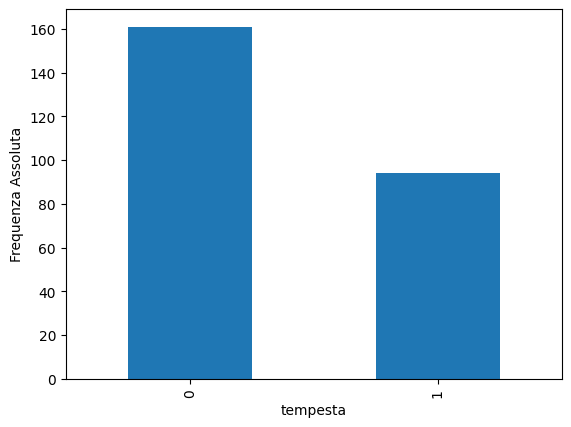

In [16]:
tempesta.plot.bar()
plt.ylabel("Frequenza Assoluta")
plt.show()

In [18]:
len(df['settore.di.pesca'].unique())

9

In [21]:
df['settore.di.pesca'].value_counts(normalize=True)

settore.di.pesca
B    0.203922
E    0.156863
I    0.156863
A    0.145098
C    0.129412
G    0.121569
H    0.035294
F    0.031373
D    0.019608
Name: proportion, dtype: float64

In [20]:
cong=pd.crosstab(index=df['settore.di.pesca'],columns=df['tempesta'])
cong

tempesta,0,1
settore.di.pesca,,
A,24,13
B,28,24
C,19,14
D,3,2
E,24,16
F,5,3
G,20,11
H,8,1
I,30,10


Giorni con tempesta: 13 Giorni senza: 24

In [36]:
prob_tempesta=94/(161+94)
prob_tempesta

0.3686274509803922

### PUNTO 10

In [24]:
len(df['tempesta'])

255

### PUNTO 11

In [39]:
settore_a=df[df["settore.di.pesca"]=="A"]
prob_tempesta_A=settore_a['tempesta'].mean()
prob_tempesta_A

0.35135135135135137

### PUNTO 12

In [41]:
prob_tempesta_A/prob_tempesta

0.9531339850488787

### PUNTO 13

In [45]:
len(settore_a)

37

In [50]:
var=settore_a['tempesta'].var()
1-var/(37*(0.1)**2)

0.36693450206963707

# Esercizio 3

In [53]:
peso_pescato=df['peso.pescato']
peso_pescato

0       5.168068
1       4.074747
2       7.358404
3       5.022524
4       5.826922
         ...    
250    13.314936
251    17.445849
252    19.351561
253    17.939520
254    19.182300
Name: peso.pescato, Length: 255, dtype: float64

il carattere pescato è continuo

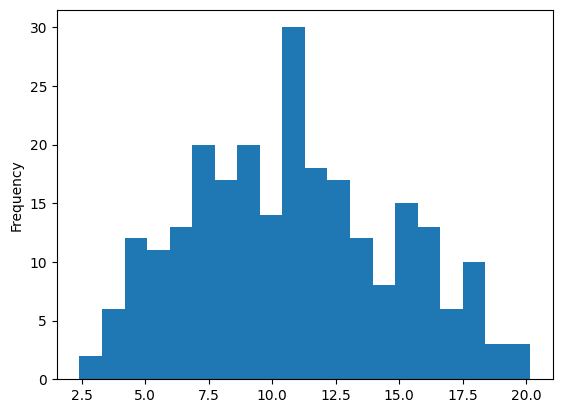

In [57]:
peso_pescato.plot.hist(bins=20)
plt.show()

In [70]:
peso_range=df[df['peso.pescato']>10]
peso_range=peso_range[peso_range['peso.pescato']<15]
len(peso_range)/len(df)

0.3764705882352941

In [73]:
mu=peso_pescato.mean()
var=peso_pescato.var()
print(mu)
print(var)

10.788632531936
16.090244498150057


In [78]:
dist=st.norm(loc=mu,scale=math.sqrt(var))
dist.cdf(15)-dist.cdf(10)

0.4310460131061045

Possiamo osservare che i due valori sono abbastanza vicini e variano di 0.06 e quindi tra i due vi è una discrepanza di 6%

Tra forza del mare e tempesta vi è una notevole correlazione. Tra peso pescato e settore anche ma inferiore.

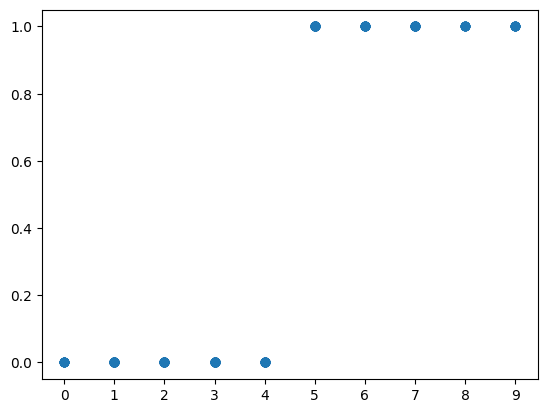

In [81]:
forza_del_mare=df['forza.del.mare']
x=np.arange(0,10,1)
tempesta=df['tempesta']
plt.scatter(forza_del_mare,tempesta)
plt.xticks(x)
plt.show()

la relazione che si deduce è che per una forza del mare bassa (tra 0 e 4) non ho una tempesta, per una forza del mare tra 5 e 9 invece si

In [83]:
forza_del_mare.corr(tempesta)

0.8412359096077463

In [89]:
dati_senza_NA=df['peso.pescato'].dropna()
dati_senza_NA

0       5.168068
1       4.074747
2       7.358404
3       5.022524
4       5.826922
         ...    
250    13.314936
251    17.445849
252    19.351561
253    17.939520
254    19.182300
Name: peso.pescato, Length: 250, dtype: float64

In [91]:
sigma=dati_senza_NA.std()
mean=dati_senza_NA.mean()
sigma/mean

0.3718047388035412